## Functional API使用

## 1. Import

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input
from keras.datasets import mnist
from keras.layers import Dense, Activation, concatenate, add
from keras.optimizers import SGD, Adadelta
from keras.utils import np_utils
from ipywidgets import interact_manual

## 2.讀入MNIST數據

In [3]:
# read mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape to fit the shape of input
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

# transform string type into int type [0,9]
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 3.Functional API架設NN
**以下為NN架構**

![flowchart](Q8-1Data/flowchart.png)

In [4]:
# construct nn structure
fc_1_1 = Dense(100, activation='relu')
fc_1_2 = Dense(100, activation='relu')

fc_2_1 = Dense(75, activation='relu')
fc_2_2 = Dense(25, activation='relu')

fc_3_1 = Dense(40, activation='relu')
fc_3_2 = Dense(10, activation='relu')
fc_3_3 = Dense(30, activation='relu')
fc_3_4 = Dense(20, activation='relu')

fc_4_1 = Dense(90, activation='relu')
fc_4_2 = Dense(20, activation='relu')

fc_5_1 = Dense(30, activation='relu')
fc_5_2 = Dense(20, activation='relu')
fc_5_3 = Dense(10, activation='relu')

fc_6_1 = Dense(10, activation='relu')
fc_6_2 = Dense(10, activation='relu')

fc_out = Dense(10, activation='softmax')

# set Input layer
x = Input(shape=(784,))

# connect each layer using Functional API
h_1_1 = fc_1_1(x)
h_1_2 = fc_1_2(x)

h_2_1 = fc_2_1(h_1_1)
h_2_2 = fc_2_2(h_1_2)
h_2_cat = concatenate([h_2_1, h_2_2])

h_3_1 = fc_3_1(h_2_1)
h_3_2 = fc_3_2(h_2_2)
h_3_3 = fc_3_3(h_2_cat)
h_3_4 = fc_3_4(h_2_cat)
h_3_cat_1 = concatenate([h_3_1, h_3_2, h_3_3])
h_3_cat_2 = concatenate([h_3_3, h_3_4])

h_4_1 = fc_4_1(h_3_cat_1)
h_4_2 = fc_4_2(h_3_cat_2)

h_5_1 = fc_5_1(h_4_1)
h_5_2 = fc_5_2(h_4_1)
h_5_3 = fc_5_3(h_4_1)
h_5_cat_1 = concatenate([h_5_1, h_5_2, h_5_3])
h_5_cat_2 = concatenate([h_5_1, h_5_2, h_5_3, h_4_2])

h_6_1 = fc_6_1(h_5_cat_1)
h_6_2 = fc_6_2(h_5_cat_2)
h_6_cat = concatenate([h_6_1, h_6_2])

y = fc_out(h_6_cat)

# merge to a model
model = Model(x, y)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 75)           7575        dense_1[0][0]                    
_____________________________________

## 4.設定並且訓練model
**loss function:** categorical_crossentropy

**optimizer:** Adadelta

In [7]:
# compile model
model.compile(loss = 'categorical_crossentropy', 
              optimizer=Adadelta(lr=1.0),
              metrics=['acc'])
model_epo50 = model.fit(x_train, y_train, batch_size = 256, 
                        epochs = 50, validation_data=(x_test, y_test) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0320 - acc: 0.9939 - val_loss: 0.2204 - val_acc: 0.9747
Epoch 2/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.0156 - acc: 0.9967 - val_loss: 0.1931 - val_acc: 0.9775
Epoch 3/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.0115 - acc: 0.9971 - val_loss: 0.2043 - val_acc: 0.9748
Epoch 4/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.0108 - acc: 0.9974 - val_loss: 0.2139 - val_acc: 0.9761
Epoch 5/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0130 - acc: 0.9970 - val_loss: 0.2061 - val_acc: 0.9771
Epoch 6/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0112 - acc: 0.9972 - val_loss: 0.2494 - val_acc: 0.9740
Epoch 7/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0139 - acc: 0.9966 - val_loss: 0.2241 - val_acc

## 5.畫出training data的historical accuracy

Text(0, 0.5, 'accuracy')

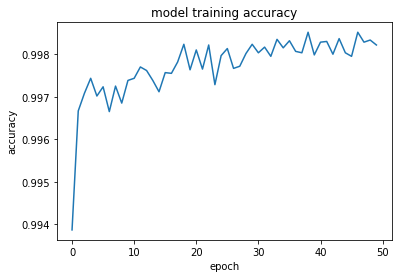

In [8]:
plt.plot(model_epo50.history['acc'])
plt.title('model training accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

## 6.計算data的準確率

| | Training Data | Testing Data |
| --- | --- | --- |
| accuracy | 99.85% | 97.69% |
| loss | 0.64% | 23.23% |

In [30]:
train_score = model.evaluate(x_train, y_train, batch_size=20000)
test_score = model.evaluate(x_test, y_test, batch_size=10000)
print('train data loss: ',train_score[0])
print('training data accuracy: ',train_score[1])
print('testing data loss: ',test_score[0])
print('testing data accuracy: ',test_score[1])

10000/10000 [==============================] - 0s 13us/step
train data loss:  0.006405303720384836
training data accuracy:  0.9985499978065491
testing data loss:  0.23234190046787262
testing data accuracy:  0.9768999814987183


## 7.互動式元件，測試test data

Widget Javascript not detected.  It may not be installed or enabled properly.


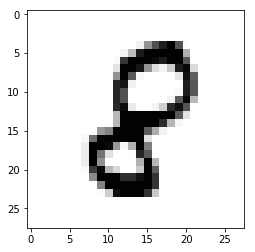

In [32]:
pred = model.predict(x_test)

def test(num):
    plt.imshow(x_test[num].reshape(28,28), cmap='Greys')
    print('NN predict this picture is number %d'%(np.argmax(pred[num])))

interact_manual(test, num=(0,9999));

---
把model存下來
===

In [31]:
model_json = model.to_json()
open('Q8-1Data/mnist_model.json','w').write(model_json)
model.save_weights('Q8-1Data/mnist_model_weights.h5')